In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('Resources/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [7]:
fraud_cases=len(df[df['fraud']==1])

In [8]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 87403


In [9]:
non_fraud_cases=len(df[df['fraud']==0])

In [10]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 912597


In [11]:
fraud=df[df['fraud']==1]

In [12]:
Nonfraud=df[df['fraud']==0]

# Continuous Variables

In [13]:
conti_variable = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']]
conti_variable.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767


array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>],
       [<AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>,
        <AxesSubplot:>]], dtype=object)

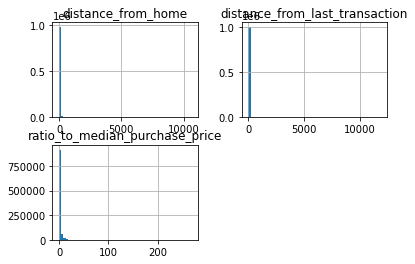

In [14]:
conti_variable.hist(bins=60)

<AxesSubplot:>

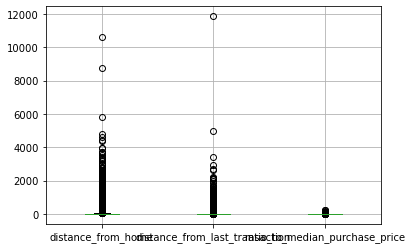

In [14]:
conti_variable.boxplot()

In [15]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [17]:
for x in conti_variable.columns:
    q25, q75 = conti_variable[x].quantile(0.25), conti_variable[x].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0) 
    
conti_variable.head()    

<ipython-input-17-da5995722e9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0)
<ipython-input-17-da5995722e9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0)
<ipython-input-17-da5995722e9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,distance_from_home_outlier,distance_from_last_transaction_outlier,ratio_to_median_purchase_price_outlier
0,57.877857,0.311140,1.945940,0,0,0
1,10.829943,0.175592,1.294219,0,0,0
2,5.091079,0.805153,0.427715,0,0,0
3,2.247564,5.600044,0.362663,0,0,0
4,44.190936,0.566486,2.222767,0,0,0


# Unbalanced Data

<AxesSubplot:xlabel='fraud', ylabel='count'>

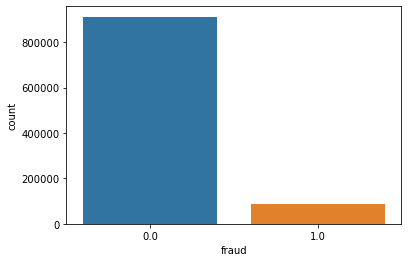

In [16]:
sns.countplot(x='fraud',data=df)

In [17]:
sm = SMOTE(sampling_strategy='minority', random_state=7)
resampled_X, resampled_Y = sm.fit_resample(df.drop('fraud', axis=1), df['fraud'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['fraud'].value_counts()

0.0    912597
1.0    912597
Name: fraud, dtype: int64

In [18]:
oversampled_df['fraud'].value_counts()

0.0    912597
1.0    912597
Name: fraud, dtype: int64

In [19]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

# Balanced Data

<AxesSubplot:xlabel='fraud', ylabel='count'>

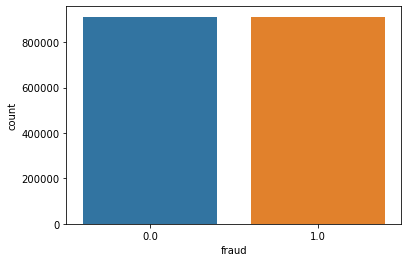

In [20]:
sns.countplot(x='fraud', data=oversampled_df)

In [21]:
oversampled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.000000,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.000000,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.000000,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.000000,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1825189,339.323378,61.110720,1.412187,1.000000,0.0,0.0,1.0,1.0
1825190,6.585948,0.109166,4.392025,1.000000,0.0,0.0,1.0,1.0
1825191,20.150916,0.503998,6.648288,1.000000,0.0,0.0,1.0,1.0
1825192,1.015895,0.775900,7.614940,0.000000,0.0,0.0,0.0,1.0


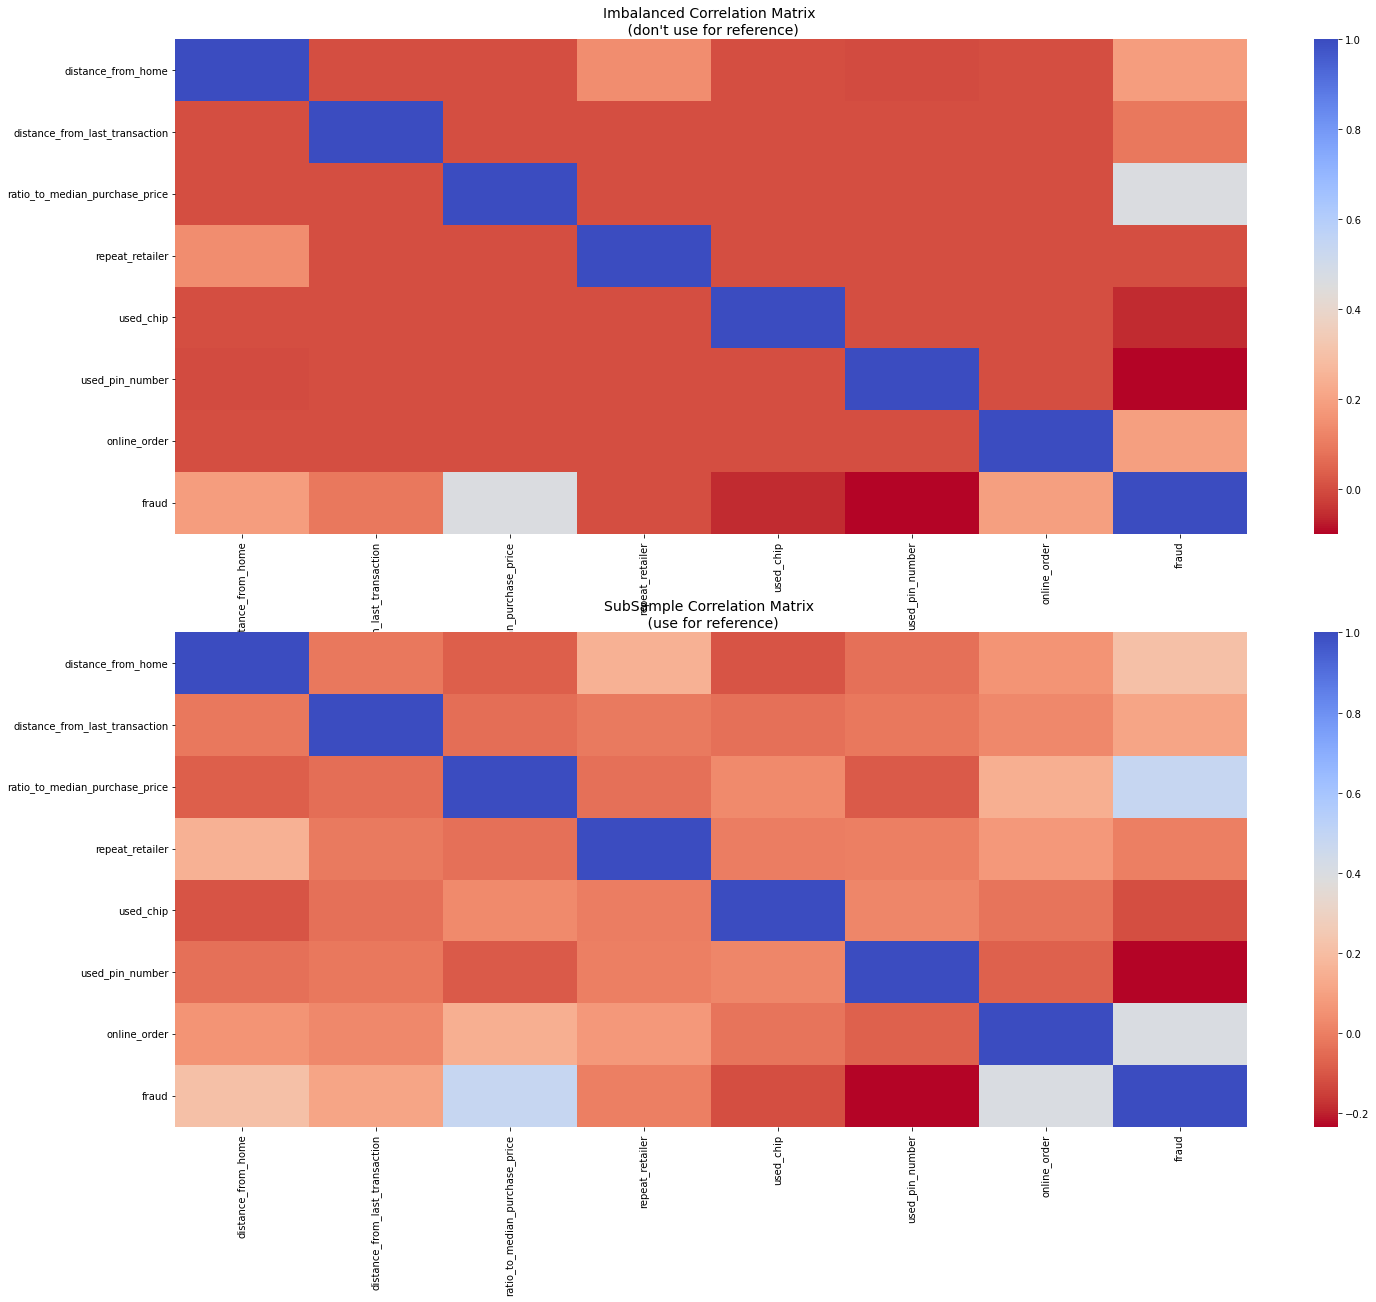

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = oversampled_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Logistic

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
x = oversampled_df.drop(['fraud'],axis=1)

In [25]:
y = oversampled_df['fraud']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [27]:
logistic = LogisticRegression(max_iter=1000)

In [28]:
model = logistic.fit(x_train, y_train)

In [29]:
prediction = model.predict(x_test)

In [30]:
accuracy_score(y_test,prediction)

0.9416501022355955

In [51]:
print("Accuracy - " + str(accuracy_score(y_test,prediction)))
print("Recall - " + str(recall_score(y_test,prediction)))
print("precision - " + str(precision_score(y_test,prediction)))

Accuracy - 0.9416501022355955
Recall - 0.9497971913409902
precision - 0.9346370858243856


C:\Users\User\anaconda3\envs\PythonData38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


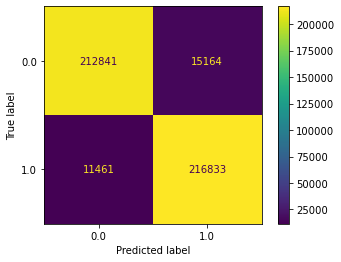

In [52]:
plot_confusion_matrix(logistic,x_test,y_test)

# Random classifier model

In [31]:
x1 = oversampled_df.drop(['fraud'],axis=1)

In [32]:
y1 = oversampled_df['fraud']

In [33]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)

In [35]:
randomforest = RandomForestClassifier()

In [36]:
model1 = randomforest.fit(x1_train,y1_train)

In [37]:
prediction1 = model1.predict(x1_test)

In [38]:
accuracy_score(y1_test,prediction1)

0.9999934253636322

In [55]:
print("Accuracy - " + str(accuracy_score(y1_test,prediction)))
print("Recall - " + str(recall_score(y1_test,prediction)))
print("precision - " + str(precision_score(y1_test,prediction)))

Accuracy - 0.9416501022355955
Recall - 0.9497971913409902
precision - 0.9346370858243856


C:\Users\User\anaconda3\envs\PythonData38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


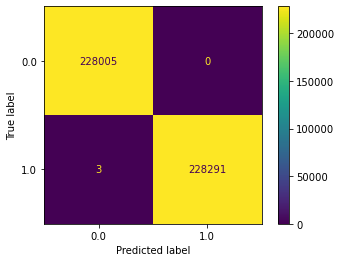

In [56]:
plot_confusion_matrix(randomforest,x1_test,y1_test)

# Decision Tree

In [42]:
x2 = oversampled_df.drop(['fraud'],axis=1)

In [40]:
y2 = oversampled_df['fraud']

In [45]:
dt = DecisionTreeRegressor()

In [46]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=123)

In [47]:
model2 = dt.fit(x2_train,y2_train)

In [48]:
prediction2 = model2.predict(x2_test)

In [49]:
accuracy_score(y2_test,prediction2)

0.9999707794045939

In [57]:
print("Accuracy - " + str(accuracy_score(y1_test,prediction)))
print("Recall - " + str(recall_score(y1_test,prediction)))
print("precision - " + str(precision_score(y1_test,prediction)))

Accuracy - 0.9416501022355955
Recall - 0.9497971913409902
precision - 0.9346370858243856
